In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [9]:
data = pd.read_csv('diabetes.csv')

In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
data.shape

(768, 9)

<Figure size 200x100 with 0 Axes>

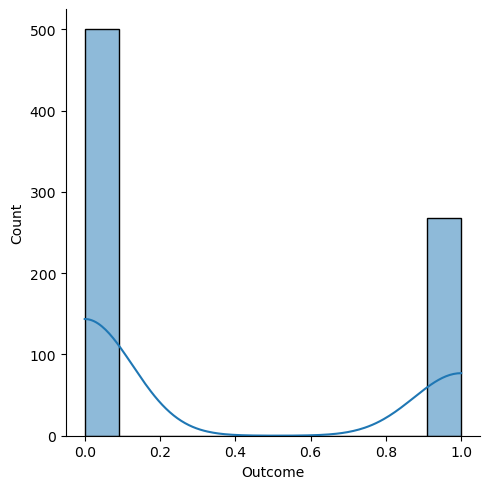

In [18]:
#histogram and normal probability plot
plt.figure(figsize=(2, 1))
sns.displot(data['Outcome'], kde=True)

In [19]:
x = data.drop('Outcome', axis=1)

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y = data[['Outcome']]
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [22]:
# Split the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=True )

In [23]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
603,7,150,78,29,126,35.2,0.692,54
118,4,97,60,23,0,28.2,0.443,22
247,0,165,90,33,680,52.3,0.427,23
157,1,109,56,21,135,25.2,0.833,23
468,8,120,0,0,0,30.0,0.183,38
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
192,7,159,66,0,0,30.4,0.383,36
629,4,94,65,22,0,24.7,0.148,21
559,11,85,74,0,0,30.1,0.300,35


In [24]:
# Create an SVM model with linear kernel and train it
model = SVC(C=1, kernel='linear')

In [25]:
model.fit(X_train, y_train)

D:\python anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, kernel='linear')

In [26]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [27]:
ytest_pred = pd.DataFrame({'y_test_pred': y_pred})
ytest_pred


,y_test_pred
0,1
1,0
2,0
3,1
4,0
...,...
149,0
150,0
151,1
152,0


In [35]:
# Reset the index of the 'y_test_actual' DataFrame and modify it in place.
y_test.reset_index(drop=True, inplace=True)

# Concatenate 'y_test_actual' and 'predict_df' DataFrames along the columns (axis=1).
prediction_result = pd.concat([y_test, ytest_pred], axis=1)

# Display the resulting 'prediction_result' DataFrame.
prediction_result

,Outcome,y_test_pred
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
149,1,0
150,0,0
151,1,1
152,0,0


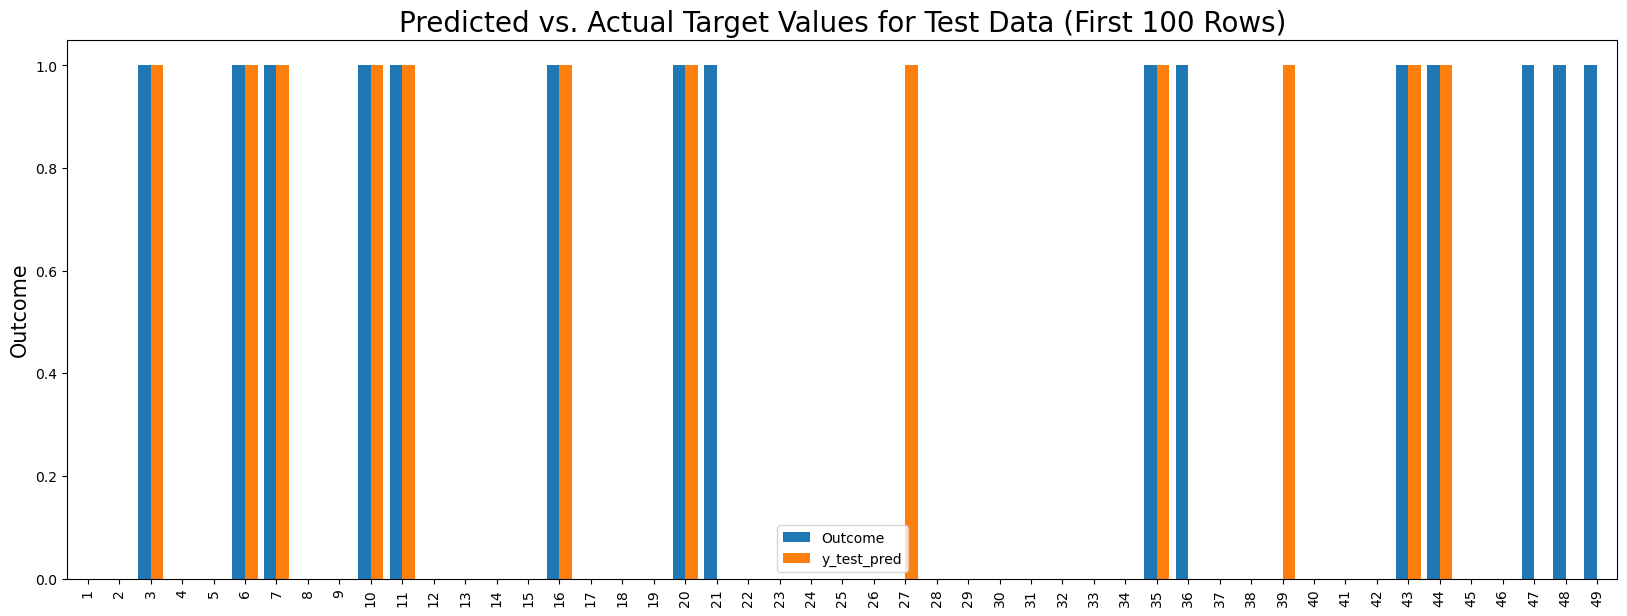

In [37]:
# Define the compare_plot function
def compare_plot(df_comp):
    df_comp_first_100 = df_comp.iloc[1:50]  # Slice the DataFrame to include only the first 100 rows
    df_comp_first_100.plot(y=['Outcome', 'y_test_pred'], kind='bar', figsize=(20, 7), width=0.8)
    plt.title('Predicted vs. Actual Target Values for Test Data (First 100 Rows)', fontsize=20)
    plt.ylabel('Outcome', fontsize=15)
    plt.show()

# Call the compare_plot function with your data
compare_plot(prediction_result)

In [28]:
accuracy_score(y_test, y_pred)

0.8181818181818182

In [29]:
# Calculate and print accuracy score, confusion matrix, and classification report
confusion_matrix(y_test, y_pred)

array([[97, 10],
       [18, 29]], dtype=int64)

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154



In [31]:
# Perform cross-validation and calculate the mean accuracy
acc = cross_val_score(model, x, y, cv=5, scoring='accuracy')

D:\python anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\python anaconda\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ra

In [32]:
acc


array([0.75974026, 0.75324675, 0.74025974, 0.81045752, 0.76470588])

In [33]:
np.mean(acc)

0.7656820303879128